## Homework #7.1 - Decision Tree

### Overview:
As you probably already learned, Decision Trees are very powerful
and, at the same time, easy-to-understand Machine Learning algorithms.
Doing this homework, you will train a couple of Decision tree algorithms
and will try to dive deeper into how it works.

### Task:
In this task, we invite you to train 2 models on a selected Data Set that
should predict the class column. The models are the following:
* Let’s, of course, start with importing the Data Set.
* The next thing you will do is create a visualization of the algorithm’s
decision boundaries to understand better how it works.
    * Choose 2 features of the Data Set with the highest absolute correlation with the target.
    * Create the decision boundary graph of these features related to the target.
    * Comment on the result that you got.

    PS: More about decision boundary you can find here: (https://bit.ly/3U7ICc7)

* Decision trees have a lot of hyperparameters. Let’s explore how they
influence the accuracy of the model. For every hyperparameter in this
list, create a line plot where on the X-axis are hyperparameter values and
on the Y-axis is the accuracy of the model for different hyperparameter
settings:
    * max depth
    * min samples split
    * min samples leaf
    * min weight fraction leaf
    * max features
    * max leaf nodes
    * min impurity decrease

    P.S. Always set random state the same.

* Comment on the impact of every hyperparameter on the model’s
accuracy.
* Train a model with the best set of hyperparameters, then export
the tree’s structure.


In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from numpy import arange, meshgrid, hstack
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [185]:
wine_quality_dataset: pd.DataFrame = pd.read_csv('dataset/wine-quality-white-and-red.csv')

In [186]:
wine_quality_dataset.head(n=10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [187]:
wine_quality_dataset.tail(n=10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6487,red,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6488,red,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
6489,red,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
6490,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [188]:
wine_quality_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


As it may be observed, no Null values are present in this dataset, which will help me avoid the manipulations with imputation of those missing values.

In [189]:
wine_quality_dataset['type'] = wine_quality_dataset['type'].map({'white': 0, 'red': 1})
wine_quality_dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [190]:
corr_matrix = wine_quality_dataset.corr()
corr_matrix

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,0.486740,0.653036,-0.187397,-0.348821,0.512678,-0.471644,-0.700357,0.390645,0.329129,0.487218,-0.032970,-0.119323
fixed acidity,0.486740,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.653036,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,-0.187397,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.348821,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.512678,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.471644,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.700357,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.390645,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,0.329129,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506


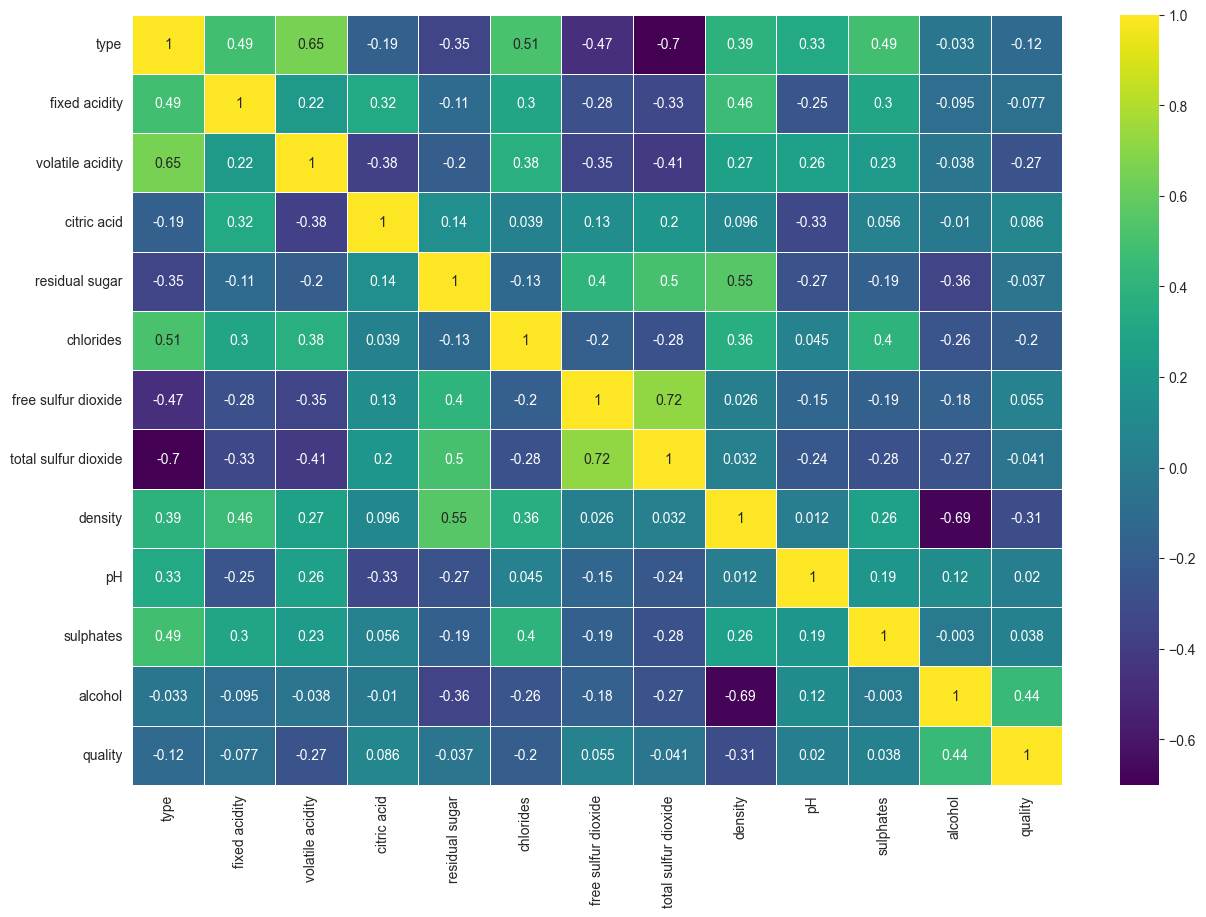

In [191]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=corr_matrix, annot=True, linewidths=0.5, cbar=True, cmap='viridis')
plt.show()

In [192]:
sorted_corr_matrix: pd.Series = corr_matrix['type'].abs().sort_values(ascending=False)
sorted_corr_matrix

type                    1.000000
total sulfur dioxide    0.700357
volatile acidity        0.653036
chlorides               0.512678
sulphates               0.487218
fixed acidity           0.486740
free sulfur dioxide     0.471644
density                 0.390645
residual sugar          0.348821
pH                      0.329129
citric acid             0.187397
quality                 0.119323
alcohol                 0.032970
Name: type, dtype: float64

In [193]:
selected_columns = sorted_corr_matrix.index[1:3].union(['type'])

selected_columns

Index(['total sulfur dioxide', 'type', 'volatile acidity'], dtype='object')

In [194]:
visualization_wine_quality_dataset = wine_quality_dataset[selected_columns]
visualization_wine_quality_dataset

,total sulfur dioxide,type,volatile acidity
0,170.0,0,0.270
1,132.0,0,0.300
2,97.0,0,0.280
3,186.0,0,0.230
4,186.0,0,0.230
...,...,...,...
6492,44.0,1,0.600
6493,51.0,1,0.550
6494,40.0,1,0.510
6495,44.0,1,0.645


In [195]:
visualization_X_features = visualization_wine_quality_dataset.drop(columns=['type'])
visualization_X_features

,total sulfur dioxide,volatile acidity
0,170.0,0.270
1,132.0,0.300
2,97.0,0.280
3,186.0,0.230
4,186.0,0.230
...,...,...
6492,44.0,0.600
6493,51.0,0.550
6494,40.0,0.510
6495,44.0,0.645


In [196]:
visualization_y_target = visualization_wine_quality_dataset['type']
visualization_y_target

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, Length: 6497, dtype: int64

<Axes: xlabel='volatile acidity', ylabel='Count'>

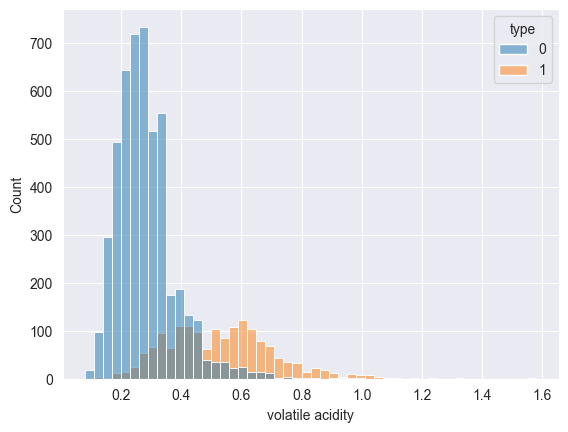

In [197]:
sns.histplot(data=visualization_wine_quality_dataset, bins=50, x=selected_columns[2], hue=selected_columns[1])

<Axes: xlabel='total sulfur dioxide', ylabel='Count'>

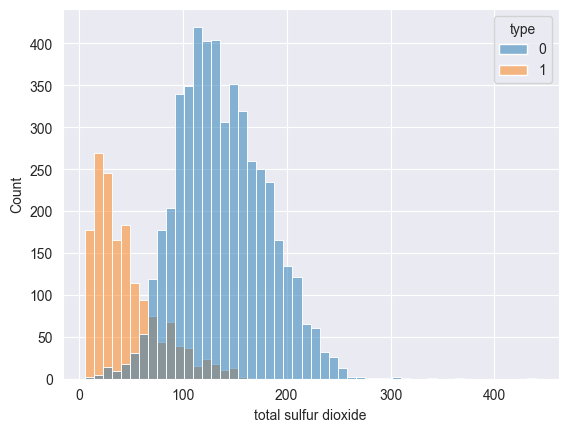

In [198]:
sns.histplot(data=visualization_wine_quality_dataset, bins=50, x=selected_columns[0], hue=selected_columns[1])

<Axes: xlabel='total sulfur dioxide', ylabel='volatile acidity'>

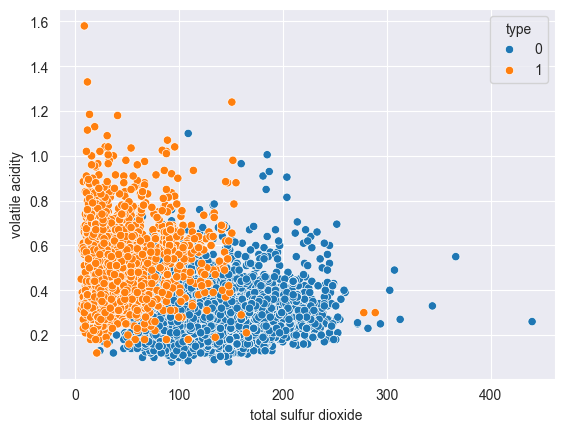

In [199]:
sns.scatterplot(data=visualization_wine_quality_dataset, x=selected_columns[0], y=selected_columns[2], hue=selected_columns[1])

<Axes: xlabel='type', ylabel='volatile acidity'>

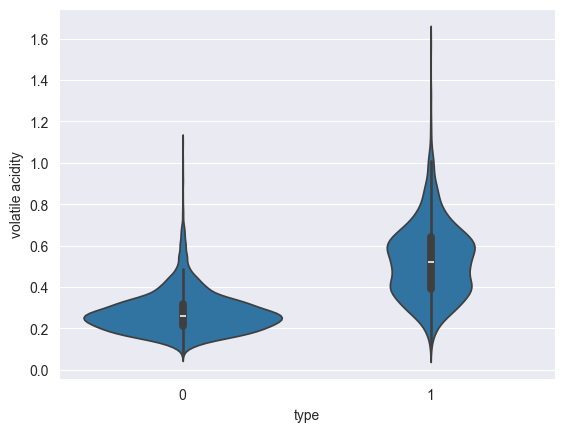

In [200]:
sns.violinplot(data=visualization_wine_quality_dataset, x=selected_columns[1], y=selected_columns[2])

<Axes: xlabel='type', ylabel='total sulfur dioxide'>

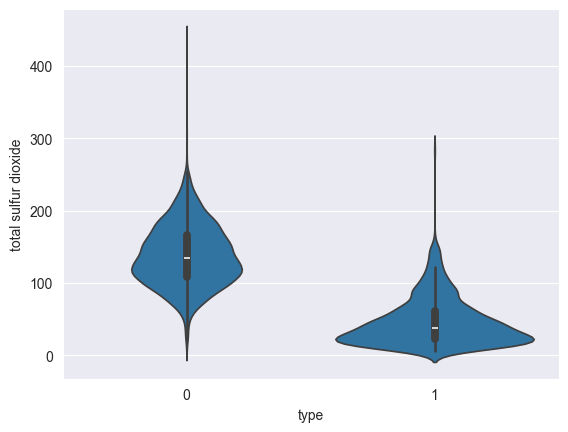

In [201]:
sns.violinplot(data=visualization_wine_quality_dataset, x=selected_columns[1], y=selected_columns[0])

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

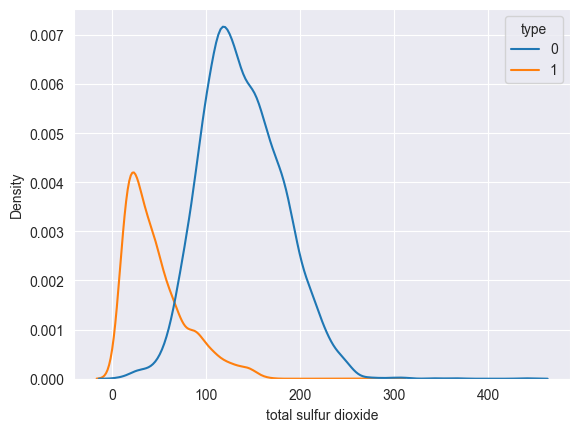

In [202]:
sns.kdeplot(data=visualization_wine_quality_dataset, x=selected_columns[0], hue=selected_columns[1])

<Axes: xlabel='volatile acidity', ylabel='Density'>

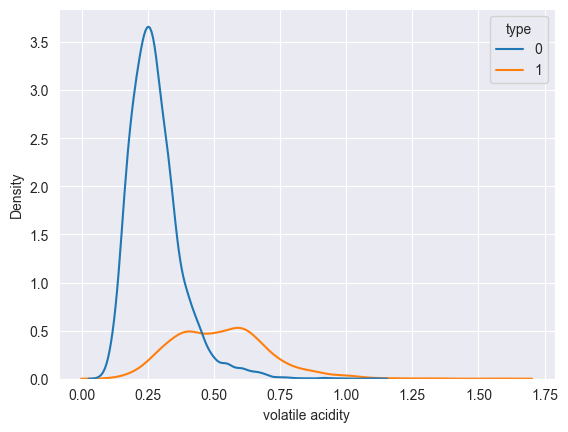

In [203]:
sns.kdeplot(data=visualization_wine_quality_dataset, x=selected_columns[2], hue=selected_columns[1])

In order to find a decision boundary, I will follow the suggestions from the SMLH and use Logistic Regression Model and Decision Tree fit on the subset of the data containing 2 feature
and the target.

In [204]:
X_train, X_test, y_train, y_test = train_test_split(visualization_wine_quality_dataset.drop(['type'], axis=1), visualization_y_target, test_size=0.3,random_state=42)

In [205]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X=X_train, y=y_train)

LogisticRegression()

In [206]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [207]:
log_reg_y_hat = logistic_regression_model.predict(X=X_test)
dec_tree_y_hat = decision_tree_model.predict(X=X_test)

In [208]:
log_reg_acc = accuracy_score(y_true=y_test, y_pred=log_reg_y_hat)
print('Logistic Regression Accuracy: %.5f' % log_reg_acc)
dec_tree_acc = accuracy_score(y_true=y_test, y_pred=dec_tree_y_hat)
print('Decision Tree Accuracy: %.5f' % dec_tree_acc)

Logistic Regression Accuracy: 0.95231
Decision Tree Accuracy: 0.94308


In [209]:
min1, max1 = visualization_X_features[selected_columns[0]].min()-1, visualization_X_features[selected_columns[0]].max()+1
min2, max2 = visualization_X_features[selected_columns[2]].min()-1, visualization_X_features[selected_columns[2]].max()+1

In [210]:
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

In [211]:
xx, yy = meshgrid(x1grid, x2grid)

In [212]:
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

In [213]:
grid = hstack((r1,r2))

In [214]:
log_reg_yy_hat = logistic_regression_model.predict(grid)
dec_tree_yy_hat = decision_tree_model.predict(grid)

D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [215]:
log_reg_zz = log_reg_yy_hat.reshape(xx.shape)
dec_tree_zz = dec_tree_yy_hat.reshape(xx.shape)

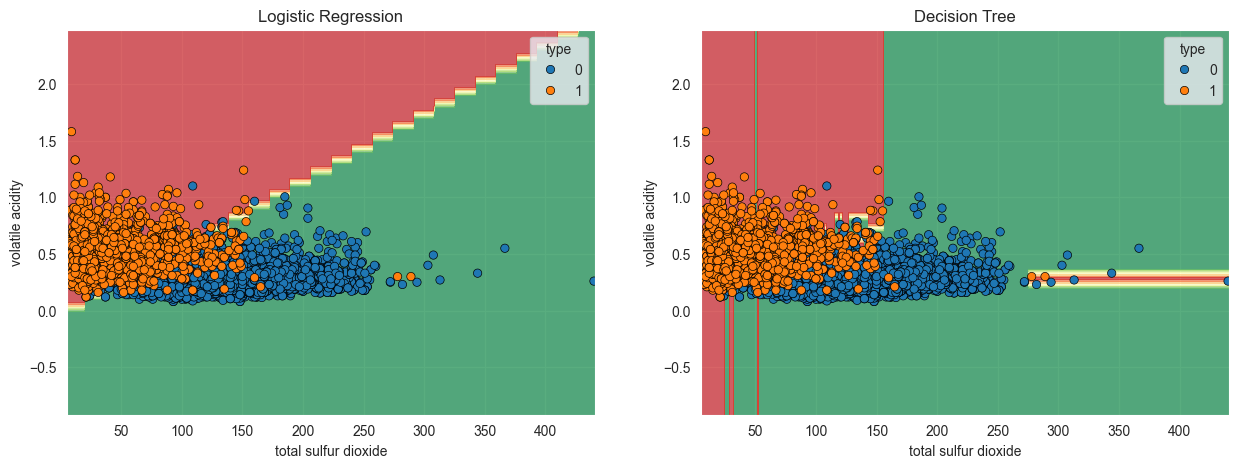

In [216]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].contourf(xx, yy, log_reg_zz, cmap='RdYlGn_r', alpha=0.7)
ax[0].set_title('Logistic Regression')

ax[1].contourf(xx, yy, dec_tree_zz, cmap='RdYlGn_r', alpha=0.7)
ax[1].set_title('Decision Tree')

for i in range(2):
    ax[i].set_xlabel(selected_columns[0])
    ax[i].set_ylabel(selected_columns[2])
    sns.scatterplot(x=selected_columns[0], y=selected_columns[2], hue=selected_columns[1], data=visualization_wine_quality_dataset, edgecolor='k', ax=ax[i])

plt.show()

As it may be seen, Decision Tree gives a better decision boundary than classical Logistic Regression model. However, the accuracy score is lower. I tested with other - numerical, features and got a better accuracy score for Decision Tree. As a conclusion on the plots, people that have exercise induced angina are less likely to have a heart disease, but mainly, people that have lower ST depression induced by exercise relative to rest are more likely to have the disease.

Logistic Regression gives us a linear decision boundary, whereas the Decision Tree gives a non-linear boundary, which is probably the issue with selected columns, since one of them is numerical and other is binary.


In [217]:
def evaluate_hyperparameter(result_dict, best_dict, hyperparameter_name, hyperparameter_values, X_train, y_train, X_test, y_test):
    best_accuracy = 0
    best_hyperparameter_value = None

    for param_value in hyperparameter_values:
        dec_tree_cls = DecisionTreeClassifier(**{hyperparameter_name: param_value}, random_state=42)
        dec_tree_cls.fit(X=X_train, y=y_train)
        y_hat = dec_tree_cls.predict(X=X_test)
        accuracy = accuracy_score(y_true=y_test, y_pred=y_hat)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameter_value = param_value

        if hyperparameter_name not in result_dict:
            result_dict[hyperparameter_name] = {'values': [], 'accuracies': []}

        result_dict[hyperparameter_name]['values'].append(param_value)
        result_dict[hyperparameter_name]['accuracies'].append(accuracy)

    best_dict[hyperparameter_name] = best_hyperparameter_value

In [218]:
hyperparameters = {
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'min_weight_fraction_leaf': np.linspace(0.0, 0.5, 20),
    'max_features': ['sqrt', 'log2'] + list(np.arange(1, 20)),
    'max_leaf_nodes': np.arange(2, 21),
    'min_impurity_decrease': np.linspace(0.0, 0.5, 20)
}

<Figure size 1500x1000 with 0 Axes>

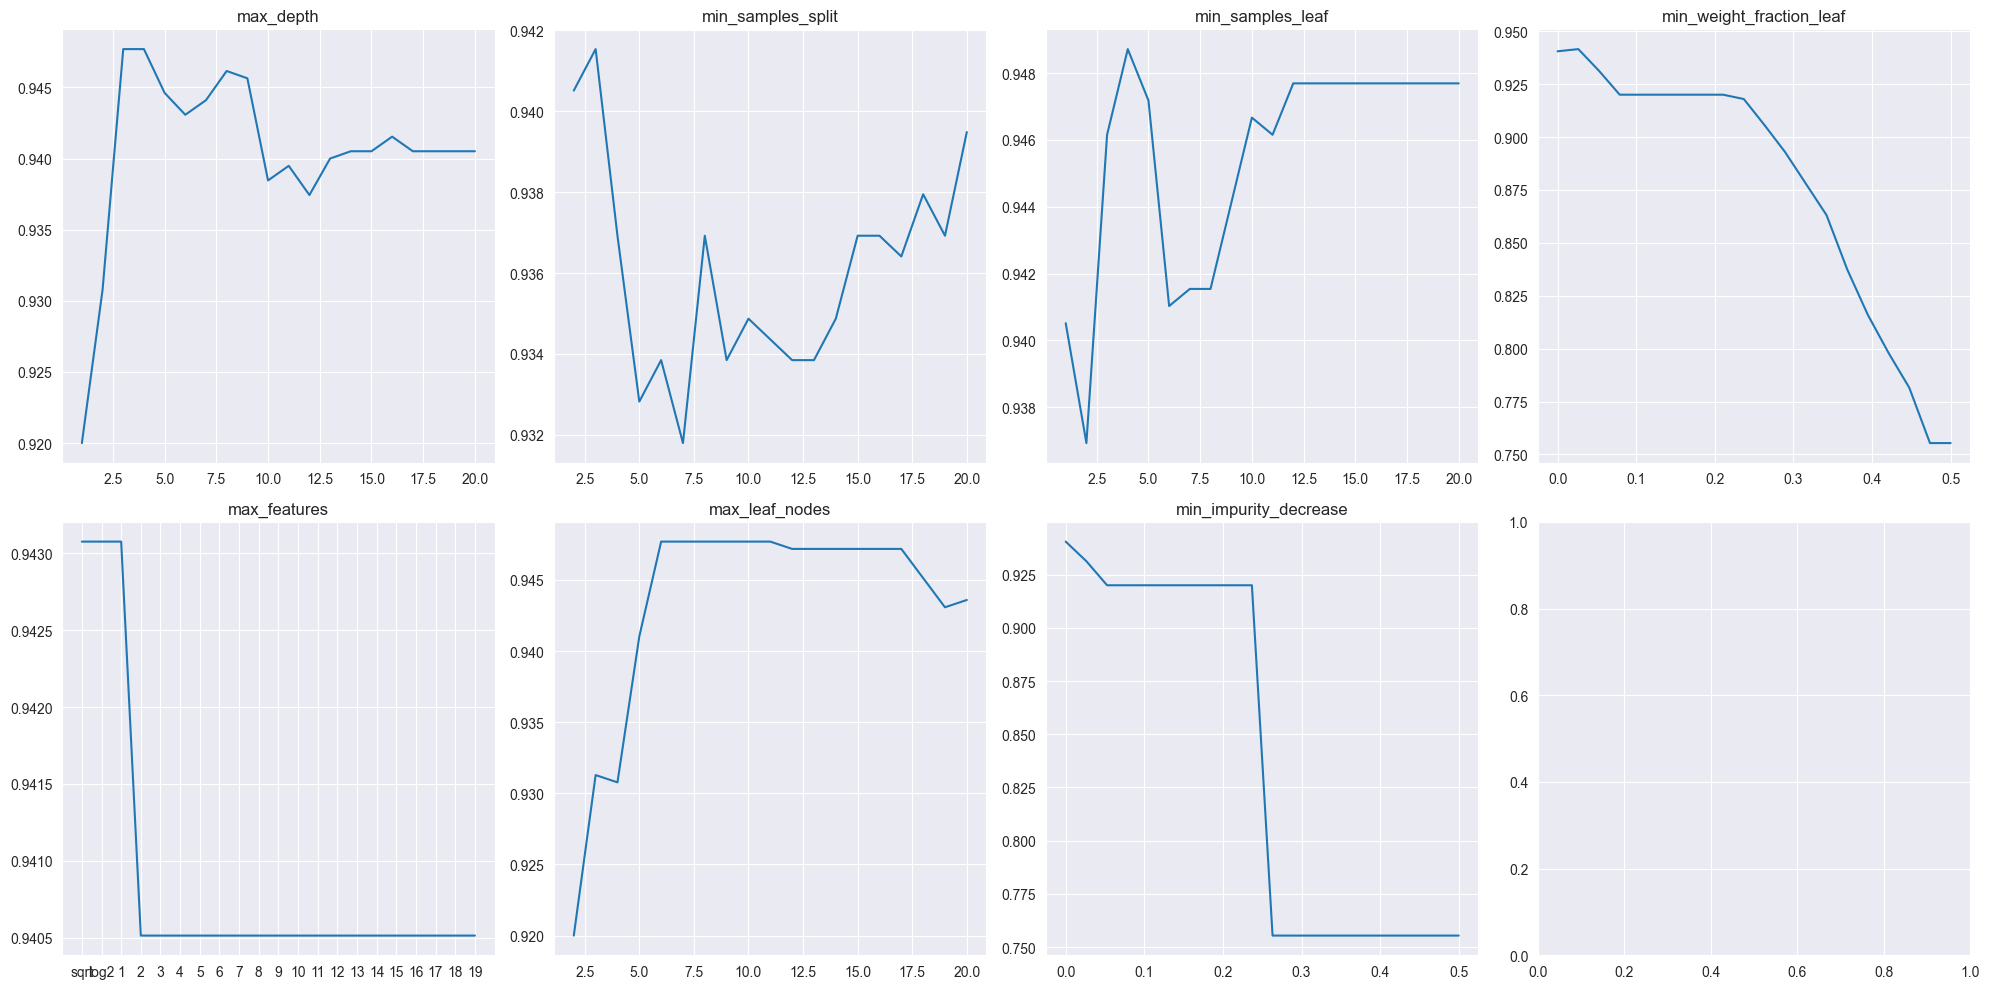

In [219]:
plt.figure(figsize=(15, 10))

result_dict = {}
best_dict = {}

for i, (hyperparameter_name, hyperparameter_values) in enumerate(hyperparameters.items(), 1):
    evaluate_hyperparameter(result_dict, best_dict, hyperparameter_name, hyperparameter_values, X_train, y_train, X_test, y_test)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()
for i, hyperparameter in enumerate(hyperparameters):
    values = result_dict[hyperparameter]['values']
    accuracy = result_dict[hyperparameter]['accuracies']
    axes[i].plot(values, accuracy)
    axes[i].set_title(hyperparameter)

plt.tight_layout()
plt.show()

In [220]:
best_dict

{'max_depth': np.int64(3),
 'min_samples_split': np.int64(3),
 'min_samples_leaf': np.int64(4),
 'min_weight_fraction_leaf': np.float64(0.02631578947368421),
 'max_features': 'sqrt',
 'max_leaf_nodes': np.int64(6),
 'min_impurity_decrease': np.float64(0.0)}

Now, I can identify the best hyperparameters to use in the training of the Decision Tree:
1. max_depth = 3 - is the parameter that shows the maximum depth of the tree. In other words, it is the number of edges in the tree from the root to the deepest node. In my case, optimal maximum depth is 3.
2. min_samples_split = 3 - is the hyperparameter that specifies the minimum number of samples required to split an internal node. In other words, if the amount of samples in the internal node is higher than 3, in my case, this node can be split further, otherwise, it becomes a leaf.
3. min_samples_leaf = 4 - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. In other words, it will specify the minimum number of samples to be in a leaf node.
4. min_weight_fraction_leaf = 0.0263 - is the parameter that specifies the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. In other words, each leaf node must contain at least, in my case, 0.0263 of the total weight of the samples.
5. max_features = sqrt - is the parameter that shows the number of features to consider when looking for the best split. By documentation of Scikit-learn, it may take int, float, 'sqrt' and 'log2' data types. In my case, model will look at $max\_features = sqrt(n\_features)$. In other words, per each split, it will take in consideration $sqrt(n\_features)$ features.
6. max_leaf_nodes = 6 - is the parameter that specifies the maximum number of leaf nodes. In my case, tree will end up with maximum 5 leaf nodes.
7. min_impurity_decrease = 0 - is the parameter that specifies the threshold at which a node will be split if this split induces a decrease of the impurity greater than or equal to this value, in my case 0, which means that a split will happen if impurity reduction is higher than 0, which is always.

In [221]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X=X_train, y=y_train)
y_hat = decision_tree_model.predict(X=X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_hat)
print(f"Accuracy score with default hyperparameters: {accuracy}")

Accuracy score with default hyperparameters: 0.9405128205128205


In [222]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

accuracy = f1_score(y_test, y_hat)
conf_matrix = confusion_matrix(y_test, y_hat)
class_report = classification_report(y_test, y_hat)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8778947368421053
Confusion Matrix:
 [[1417   56]
 [  60  417]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1473
           1       0.88      0.87      0.88       477

    accuracy                           0.94      1950
   macro avg       0.92      0.92      0.92      1950
weighted avg       0.94      0.94      0.94      1950



In [223]:
decision_tree_model_manual_params = DecisionTreeClassifier(random_state=42, **best_dict)
decision_tree_model_manual_params.fit(X=X_train, y=y_train)
y_hat = decision_tree_model_manual_params.predict(X=X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_hat)
print(f"Accuracy score with selected best hyperparameters: {accuracy}")

Accuracy score with selected best hyperparameters: 0.9328205128205128


In [224]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

accuracy = f1_score(y_test, y_hat)
conf_matrix = confusion_matrix(y_test, y_hat)
class_report = classification_report(y_test, y_hat)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8607863974495218
Confusion Matrix:
 [[1414   59]
 [  72  405]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1473
           1       0.87      0.85      0.86       477

    accuracy                           0.93      1950
   macro avg       0.91      0.90      0.91      1950
weighted avg       0.93      0.93      0.93      1950



In [230]:
# Drop max_features
best_dict['max_features'] = None

In [231]:
decision_tree_model_manual_params = DecisionTreeClassifier(random_state=42, **best_dict)
decision_tree_model_manual_params.fit(X=X_train, y=y_train)
y_hat = decision_tree_model_manual_params.predict(X=X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_hat)
print(f"Accuracy score with selected best hyperparameters: {accuracy}")

Accuracy score with selected best hyperparameters: 0.9415384615384615


In [232]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

accuracy = f1_score(y_test, y_hat)
conf_matrix = confusion_matrix(y_test, y_hat)
class_report = classification_report(y_test, y_hat)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8810020876826722
Confusion Matrix:
 [[1414   59]
 [  55  422]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1473
           1       0.88      0.88      0.88       477

    accuracy                           0.94      1950
   macro avg       0.92      0.92      0.92      1950
weighted avg       0.94      0.94      0.94      1950



As a result, I observed that both DTs are working at around 0.940 and 0.933 accuracy, and I decided to use default value for $max\_features$ in order to observe how it will behave, since its impact is not very clear on the plot, and obtained a slightly better result of 0.941 accuracy score.

In [227]:
from sklearn import tree

tree.export_graphviz(decision_tree_model_manual_params,
                     out_file='tree_images/manual_selected_params_decision_tree.dot',
                     feature_names=X_train.columns,
                     class_names=y_train.unique().astype(str),
                     filled=True,
                     leaves_parallel=True,
                     proportion=True,
                     rounded=True)


In [228]:
import pydot

(graph,) = pydot.graph_from_dot_file('tree_images/manual_selected_params_decision_tree.dot')
graph.write_png('tree_images/manual_selected_params_decision_tree.png')

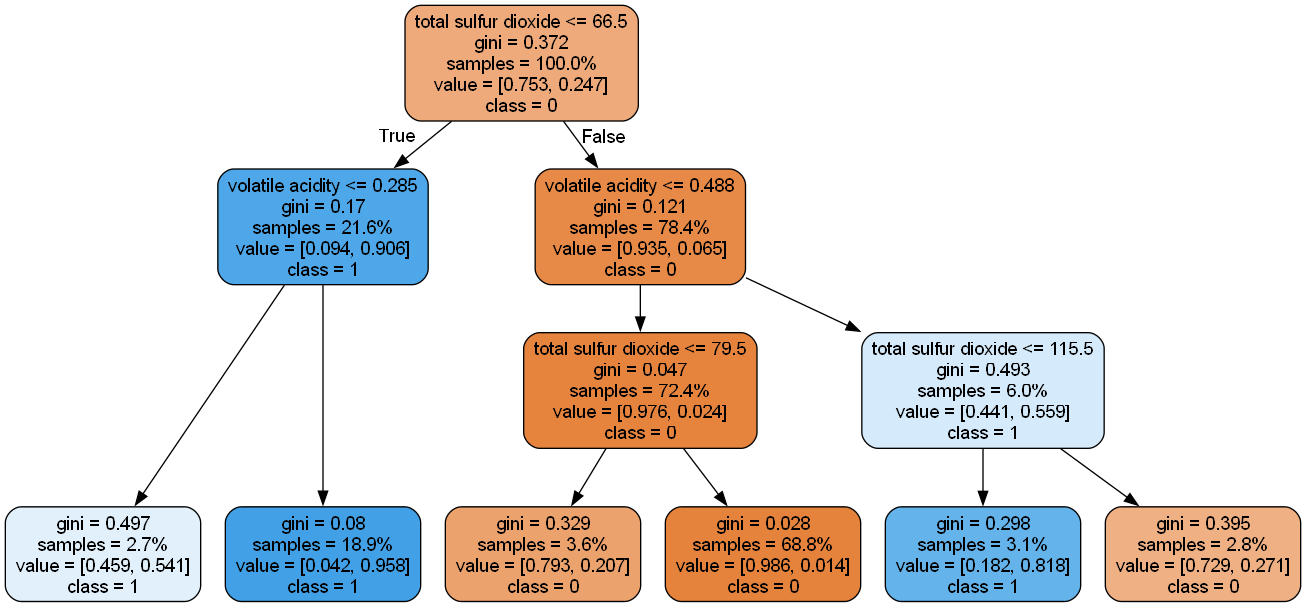

In [229]:
from IPython.display import Image

Image(filename='tree_images/manual_selected_params_decision_tree.png')